## Movie rating prediction 

## Data understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_df = pd.read_csv('India movies.csv')
movie_df


Name    Year Duration            Genre  \
0                                     NaN     NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                             #Homecoming -2021.0   90 min   Drama, Musical   
3                                 #Yaaram -2019.0  110 min  Comedy, Romance   
4                       ...And Once Again -2010.0  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga -1988.0      NaN           Action   
15505                               Zulmi -1999.0  129 min    Action, Drama   
15506                           Zulmi Raj -2005.0      NaN           Action   
15507                       Zulmi Shikari -1988.0      NaN           Action   
15508                        Zulm-O-Sitam -1998.0  130 min    Action, Drama   

       Rating Votes            Director           Actor 1             Actor 2  \
0         NaN   NaN       J.S. Randhawa          Manmauji              Birbal   
1         7.0     8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2         NaN   NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3         4.4    35          Ovais Khan           Prateik          Ishita Raj   
4         NaN   NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...       ...   ...                 ...               ...                 ...   
15504     4.6    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505     4.5   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506     NaN   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507     NaN   NaN                 NaN               NaN                 NaN   
15508     6.2    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15509 rows x 10 columns]

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [4]:
movie_df.describe()

Year       Rating
count  14981.000000  7919.000000
mean   -1987.012215     5.841621
std       25.416689     1.381777
min    -2022.000000     1.100000
25%    -2009.000000     4.900000
50%    -1991.000000     6.000000
75%    -1968.000000     6.800000
max    -1913.000000    10.000000

In [5]:
movie_df.shape

(15509, 10)

## Data Cleaning

In [6]:
movie_df.isnull().sum()

Name           1
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
movie_df.duplicated().sum()

6

In [8]:
movie_df.drop_duplicates(inplace = True)

In [9]:
movie_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [10]:
#drop name,year,vote,Duration.
movie_df.drop(['Year'], axis =1, inplace = True)
movie_df

Name Duration            Genre  Rating  \
0                                     NaN      NaN            Drama     NaN   
1      #Gadhvi (He thought he was Gandhi)  109 min            Drama     7.0   
2                             #Homecoming   90 min   Drama, Musical     NaN   
3                                 #Yaaram  110 min  Comedy, Romance     4.4   
4                       ...And Once Again  105 min            Drama     NaN   
...                                   ...      ...              ...     ...   
15504                 Zulm Ko Jala Doonga      NaN           Action     4.6   
15505                               Zulmi  129 min    Action, Drama     4.5   
15506                           Zulmi Raj      NaN           Action     NaN   
15507                       Zulmi Shikari      NaN           Action     NaN   
15508                        Zulm-O-Sitam  130 min    Action, Drama     6.2   

      Votes            Director           Actor 1             Actor 2  \
0       NaN       J.S. Randhawa          Manmauji              Birbal   
1         8       Gaurav Bakshi      Rasika Dugal      Vivek Ghamande   
2       NaN  Soumyajit Majumdar      Sayani Gupta   Plabita Borthakur   
3        35          Ovais Khan           Prateik          Ishita Raj   
4       NaN        Amol Palekar      Rajat Kapoor  Rituparna Sengupta   
...     ...                 ...               ...                 ...   
15504    11       Mahendra Shah  Naseeruddin Shah       Sumeet Saigal   
15505   655          Kuku Kohli      Akshay Kumar      Twinkle Khanna   
15506   NaN          Kiran Thej   Sangeeta Tiwari                 NaN   
15507   NaN                 NaN               NaN                 NaN   
15508    20        K.C. Bokadia        Dharmendra          Jaya Prada   

               Actor 3  
0      Rajendra Bhatia  
1        Arvind Jangid  
2           Roy Angana  
3      Siddhant Kapoor  
4          Antara Mali  
...                ...  
15504    Suparna Anand  
15505      Aruna Irani  
15506              NaN  
15507              NaN  
15508      Arjun Sarja  

[15503 rows x 9 columns]

In [11]:
movie_df.describe()

Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000

In [12]:
## dropping null values
movie_df.dropna(subset=['Name'], inplace = True)
movie_df.dropna(subset=['Genre','Director', 'Actor 1', 'Actor 2','Actor 3'] ,inplace = True)

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11366 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11366 non-null  object 
 1   Duration  6528 non-null   object 
 2   Genre     11366 non-null  object 
 3   Rating    7558 non-null   float64
 4   Votes     7559 non-null   object 
 5   Director  11366 non-null  object 
 6   Actor 1   11366 non-null  object 
 7   Actor 2   11366 non-null  object 
 8   Actor 3   11366 non-null  object 
dtypes: float64(1), object(8)
memory usage: 888.0+ KB


In [14]:
movie_df["Votes"]=movie_df["Votes"].replace("$5.16M", 516)
movie_df["Votes"] = pd.to_numeric(movie_df['Votes'].str.replace(',',''))

In [15]:
movie_df['Duration']= movie_df['Duration'].str.replace('min','').apply(pd.to_numeric)

In [16]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11366 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11366 non-null  object 
 1   Duration  6528 non-null   float64
 2   Genre     11366 non-null  object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   float64
 5   Director  11366 non-null  object 
 6   Actor 1   11366 non-null  object 
 7   Actor 2   11366 non-null  object 
 8   Actor 3   11366 non-null  object 
dtypes: float64(3), object(6)
memory usage: 888.0+ KB


In [17]:
## filling null values for rating
movie_df['Rating'].fillna(movie_df['Rating'].mode().max(), inplace = True)

## filling null values for duration
movie_df['Duration'].fillna(movie_df['Duration'].mean(),inplace= True)

## filling null values for votes
movie_df['Votes'].fillna(movie_df['Votes'].mean(), inplace= True)
movie_df['Votes'] =movie_df['Votes'].round(1)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11366 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11366 non-null  object 
 1   Duration  11366 non-null  float64
 2   Genre     11366 non-null  object 
 3   Rating    11366 non-null  float64
 4   Votes     11366 non-null  float64
 5   Director  11366 non-null  object 
 6   Actor 1   11366 non-null  object 
 7   Actor 2   11366 non-null  object 
 8   Actor 3   11366 non-null  object 
dtypes: float64(3), object(6)
memory usage: 888.0+ KB


## Data visualisation

In [18]:
# we will visualize our dataset based on rating,genre,director,actor 1, actor 2, actor 3,name.

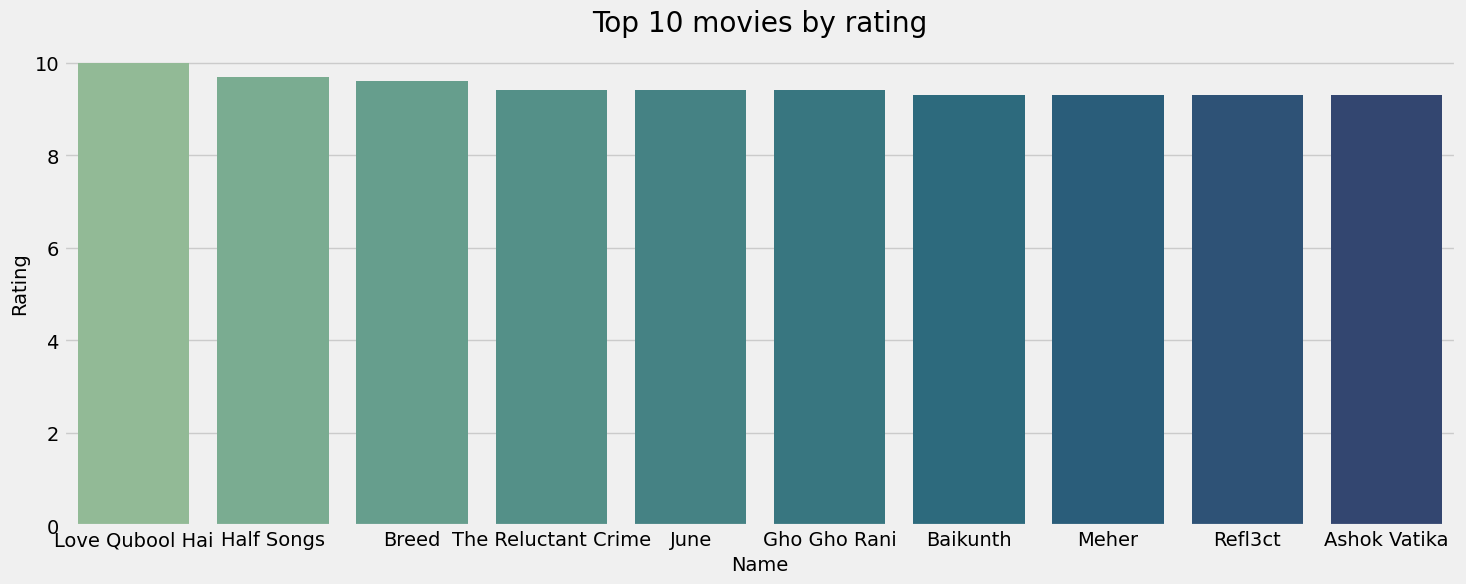

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [19]:
# we want to see the top 10 movies by rating
top_movies = movie_df[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(16,6))
sns.barplot(data = top_movies, x ='Name', y = 'Rating',palette ='crest' )
plt.title('Top 10 movies by rating')
plt.show()
plt.figure('Top 10 movies by rating.jpg')

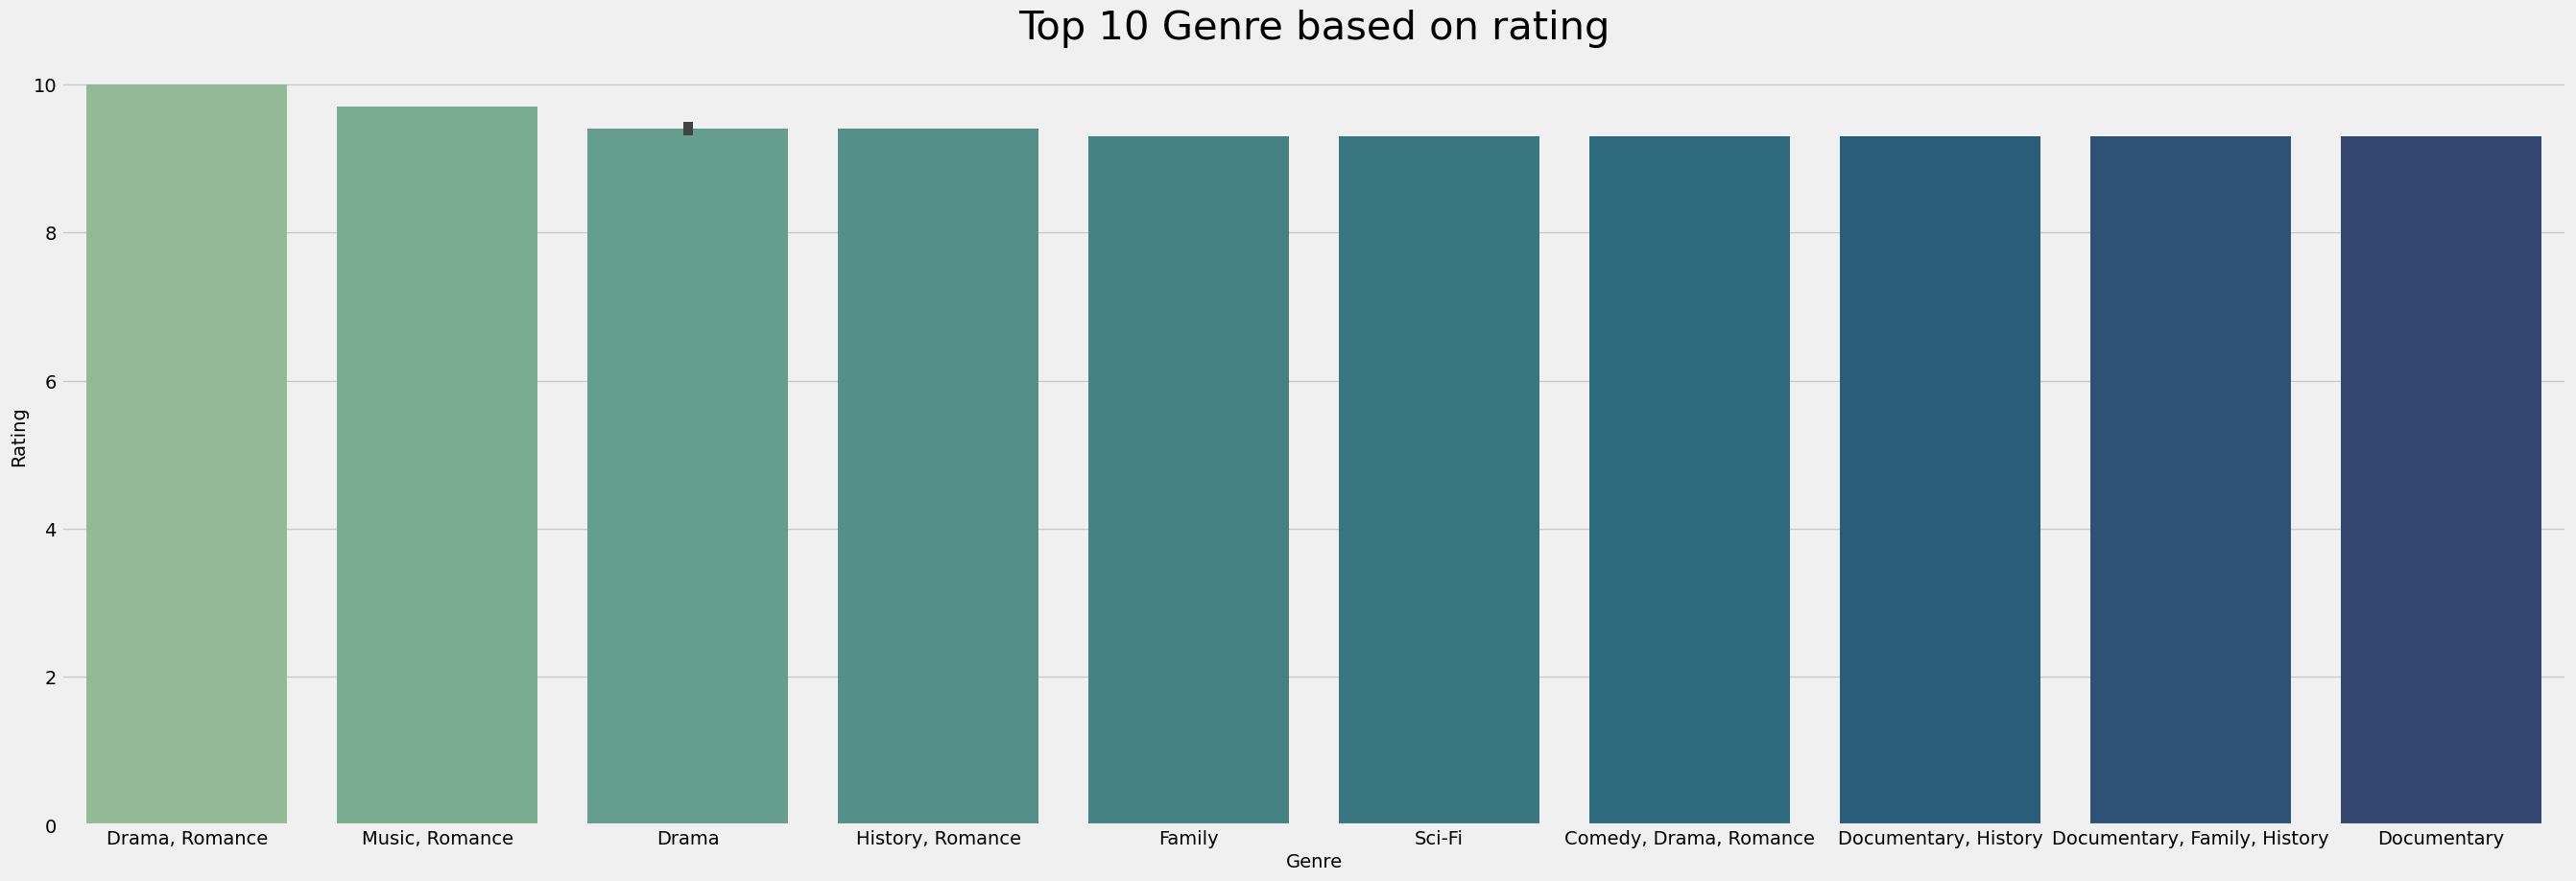

<Figure size 640x480 with 0 Axes>

In [20]:
#top 10 genre by rating
top_genre = movie_df[['Genre', 'Rating']].sort_values(by='Rating', ascending=False).head(14)
plt.figure(figsize=(30,10))
sns.barplot(data = top_genre,x = 'Genre', y ='Rating', palette = 'crest')
plt.title('Top 10 Genre based on rating',{'fontsize':30})
plt.show()
plt.savefig('Top 10 Genre based on rating.jpg')

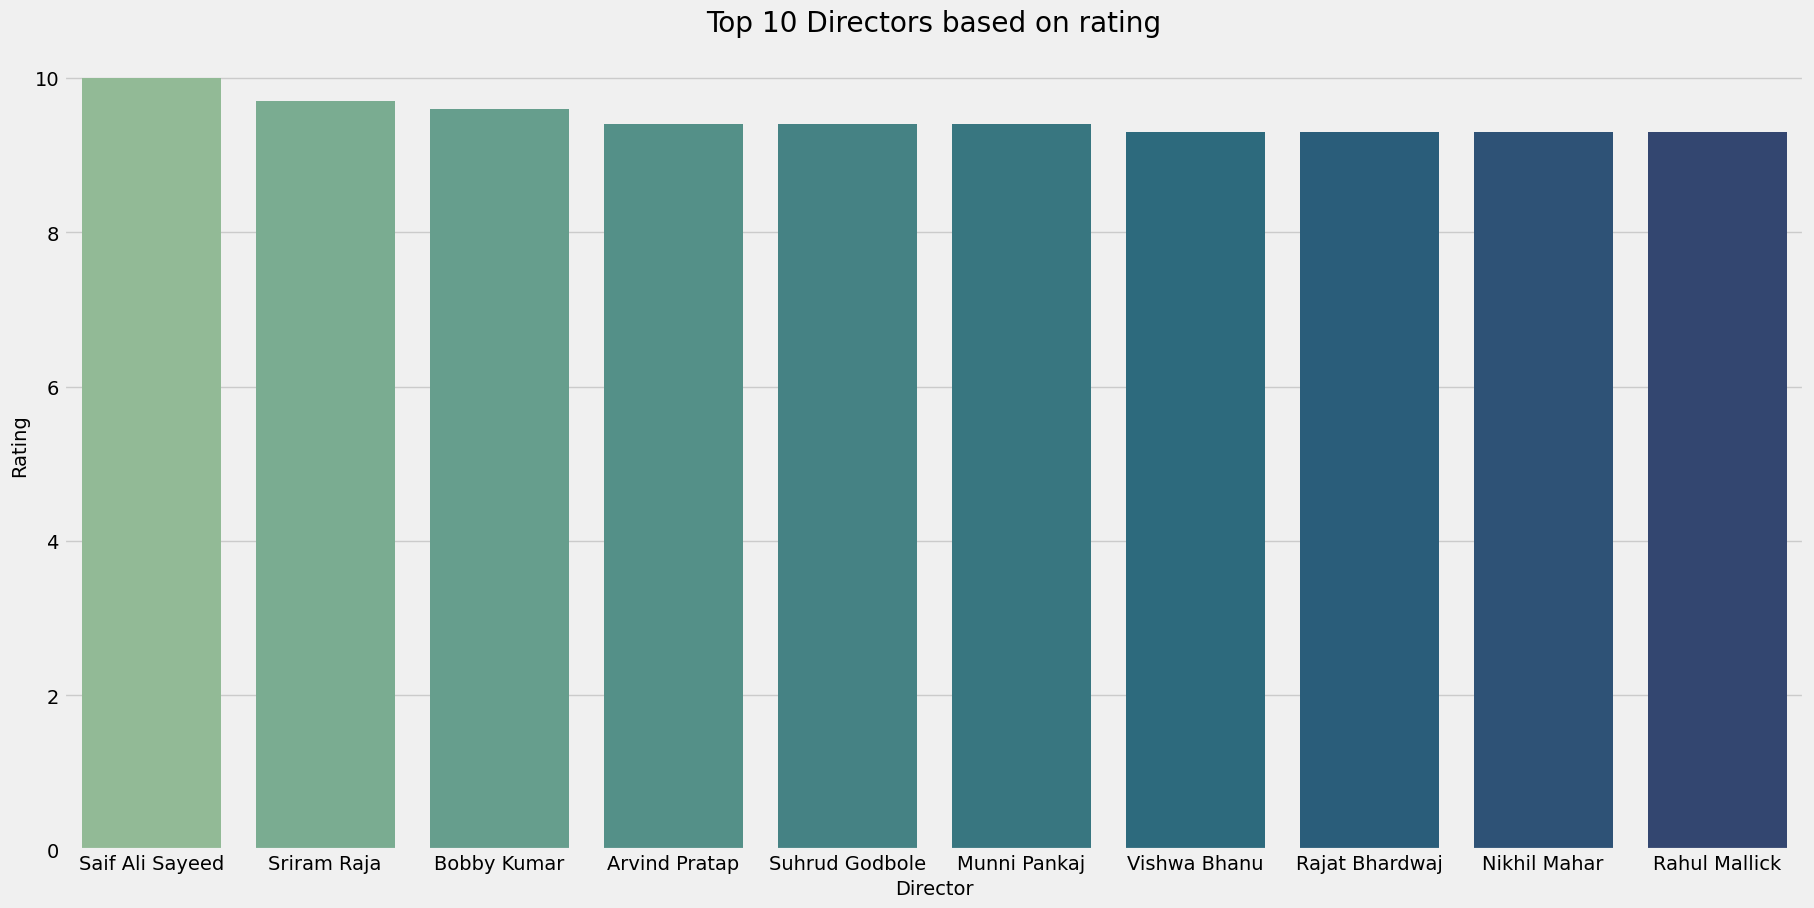

<Figure size 640x480 with 0 Axes>

In [21]:
#top 10 directors based on rating
top_directors = movie_df[['Director', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(data = top_directors,x = 'Director', y ='Rating', palette = 'crest')
plt.title('Top 10 Directors based on rating')
plt.show()
plt.savefig('Top 10 Directors based on rating.jpg')

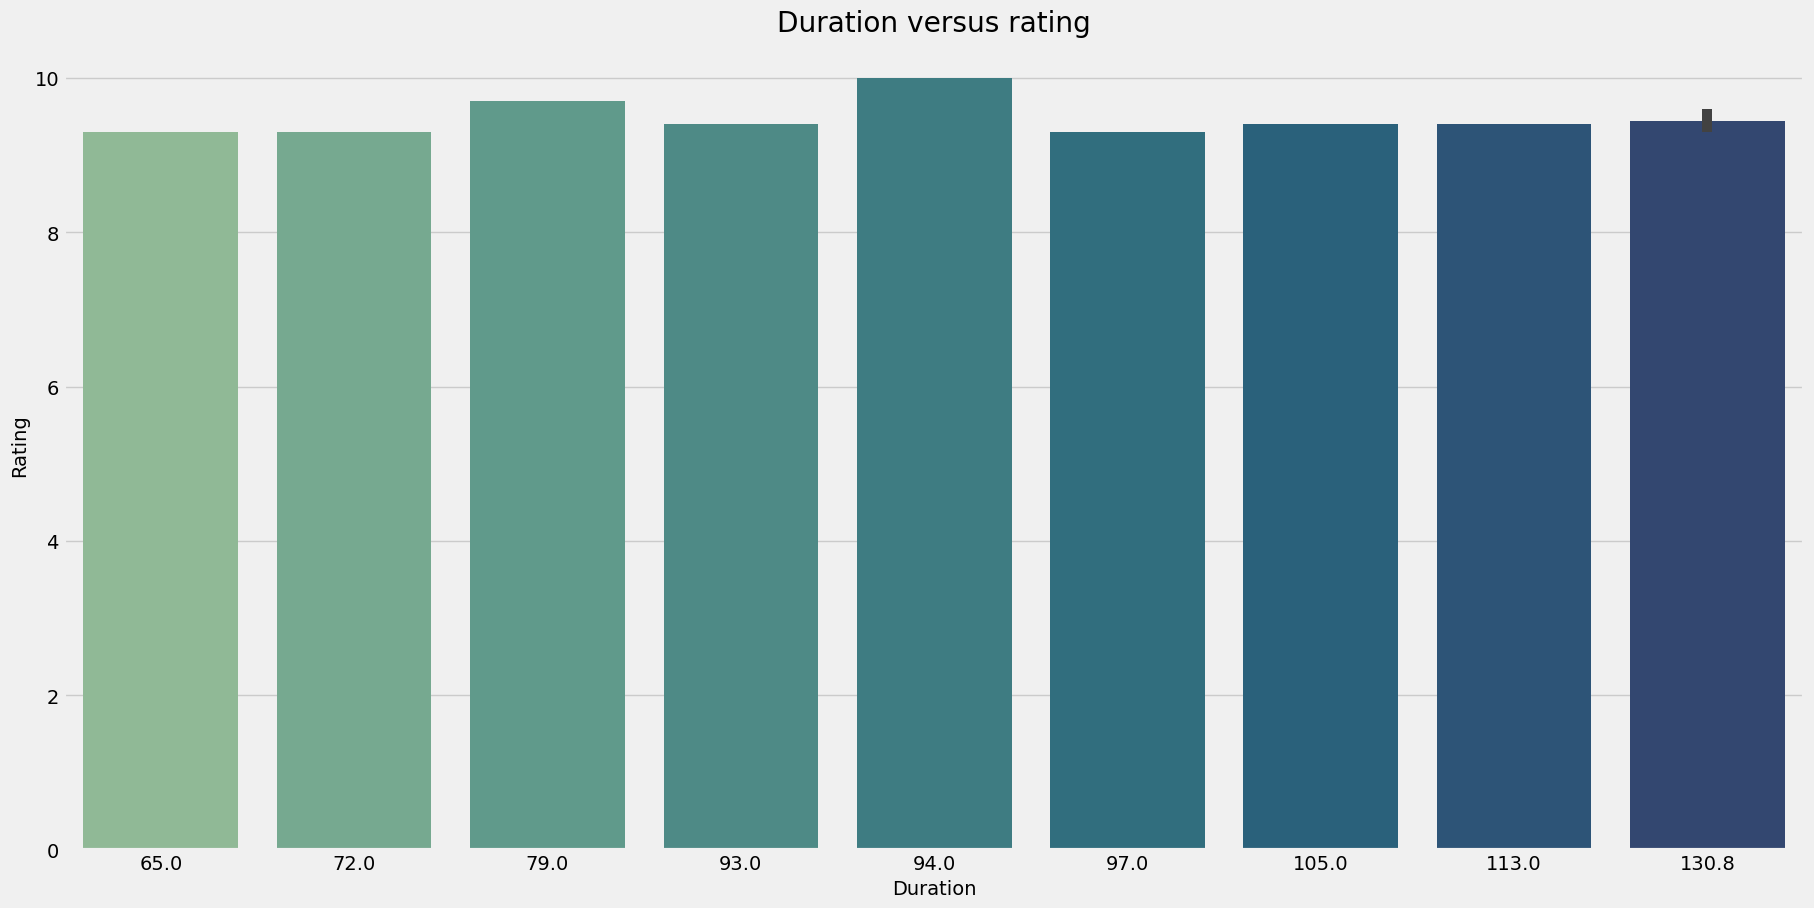

<Figure size 640x480 with 0 Axes>

In [22]:
#Duration versus rating
movie_df['Duration']= movie_df['Duration'].round(1)
top_directors = movie_df[['Duration', 'Rating']].sort_values(ascending = False,by='Rating').head(10)
plt.figure(figsize=(20,10))
sns.barplot(data = top_directors,x = 'Duration', y ='Rating', palette = 'crest')
plt.title('Duration versus rating')
plt.show()
plt.savefig('Duration versus rating.jpg')

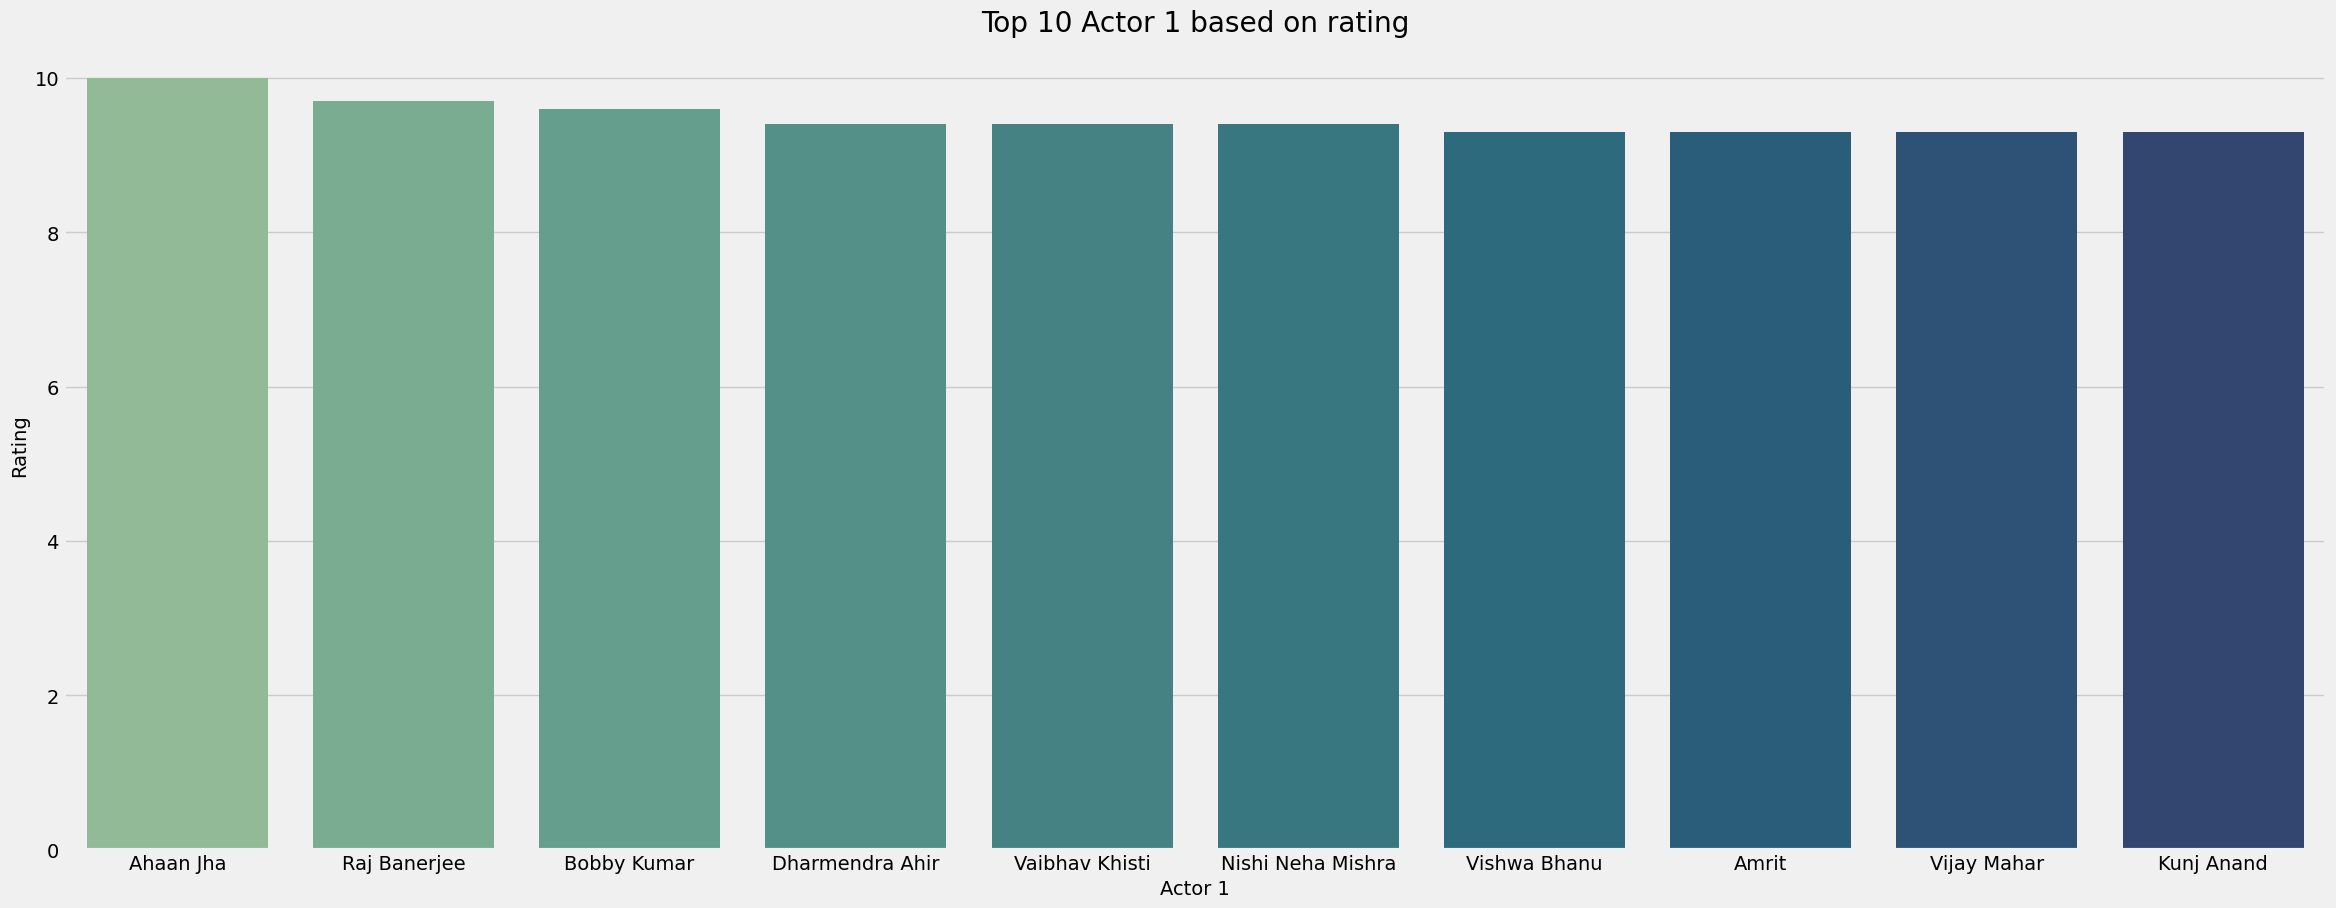

<Figure size 640x480 with 0 Axes>

In [23]:
##plotting best 10 actors by rating
                
actor_1 =movie_df[['Actor 1','Rating']].sort_values(by ='Rating', ascending=False).head(10)
plt.figure(figsize=(26,10))
sns.barplot(data = actor_1 ,x = 'Actor 1', y ='Rating', palette = 'crest')
plt.title('Top 10 Actor 1 based on rating')
plt.show()
plt.savefig('Top 10 Actor 1 based on rating.jpg')

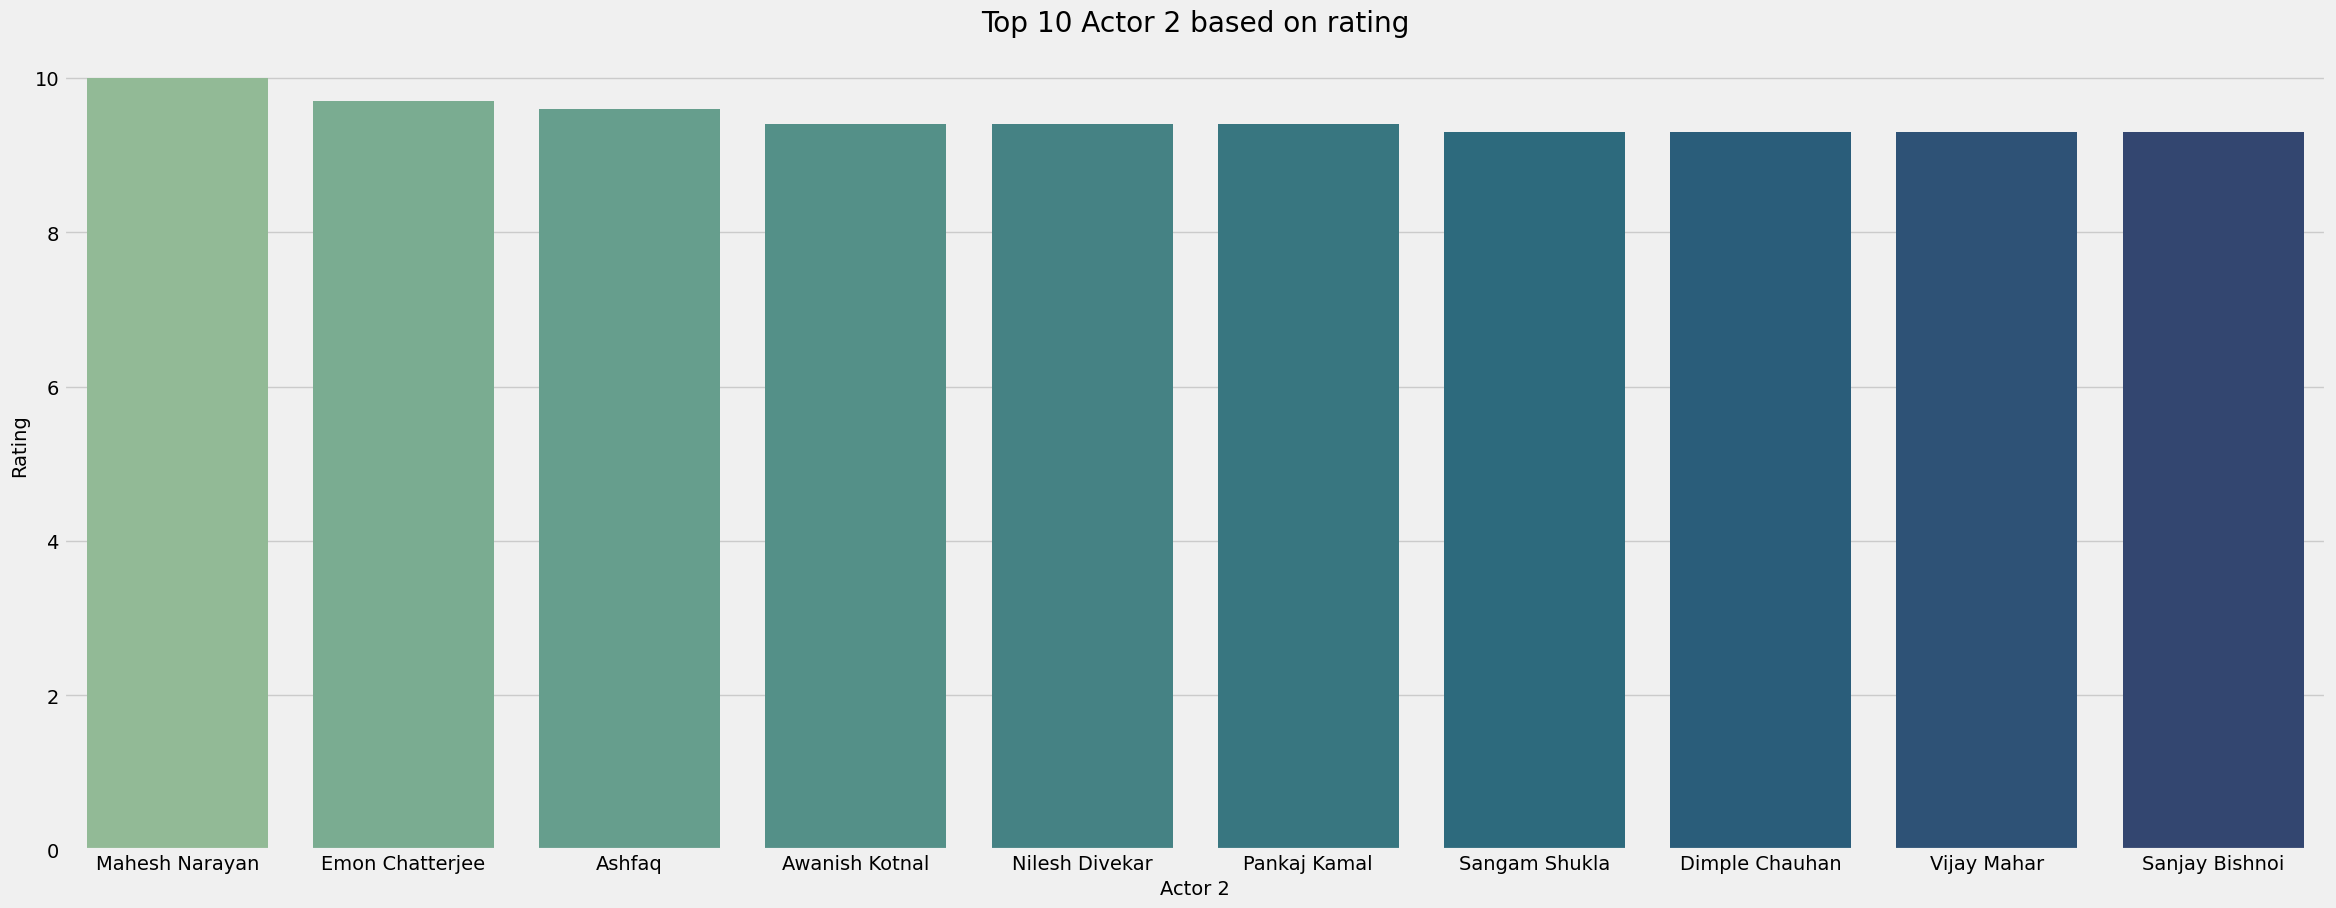

<Figure size 640x480 with 0 Axes>

In [24]:
##plotting best 10 actors by rating
                
actor_2 =movie_df[['Actor 2','Rating']].sort_values(by ='Rating', ascending=False).head(10)
plt.figure(figsize=(26,10))
sns.barplot(data = actor_2 ,x = 'Actor 2', y ='Rating', palette = 'crest')
plt.title('Top 10 Actor 2 based on rating')
plt.show()
plt.savefig('Top 10 Actor 2 based on rating.jpg')

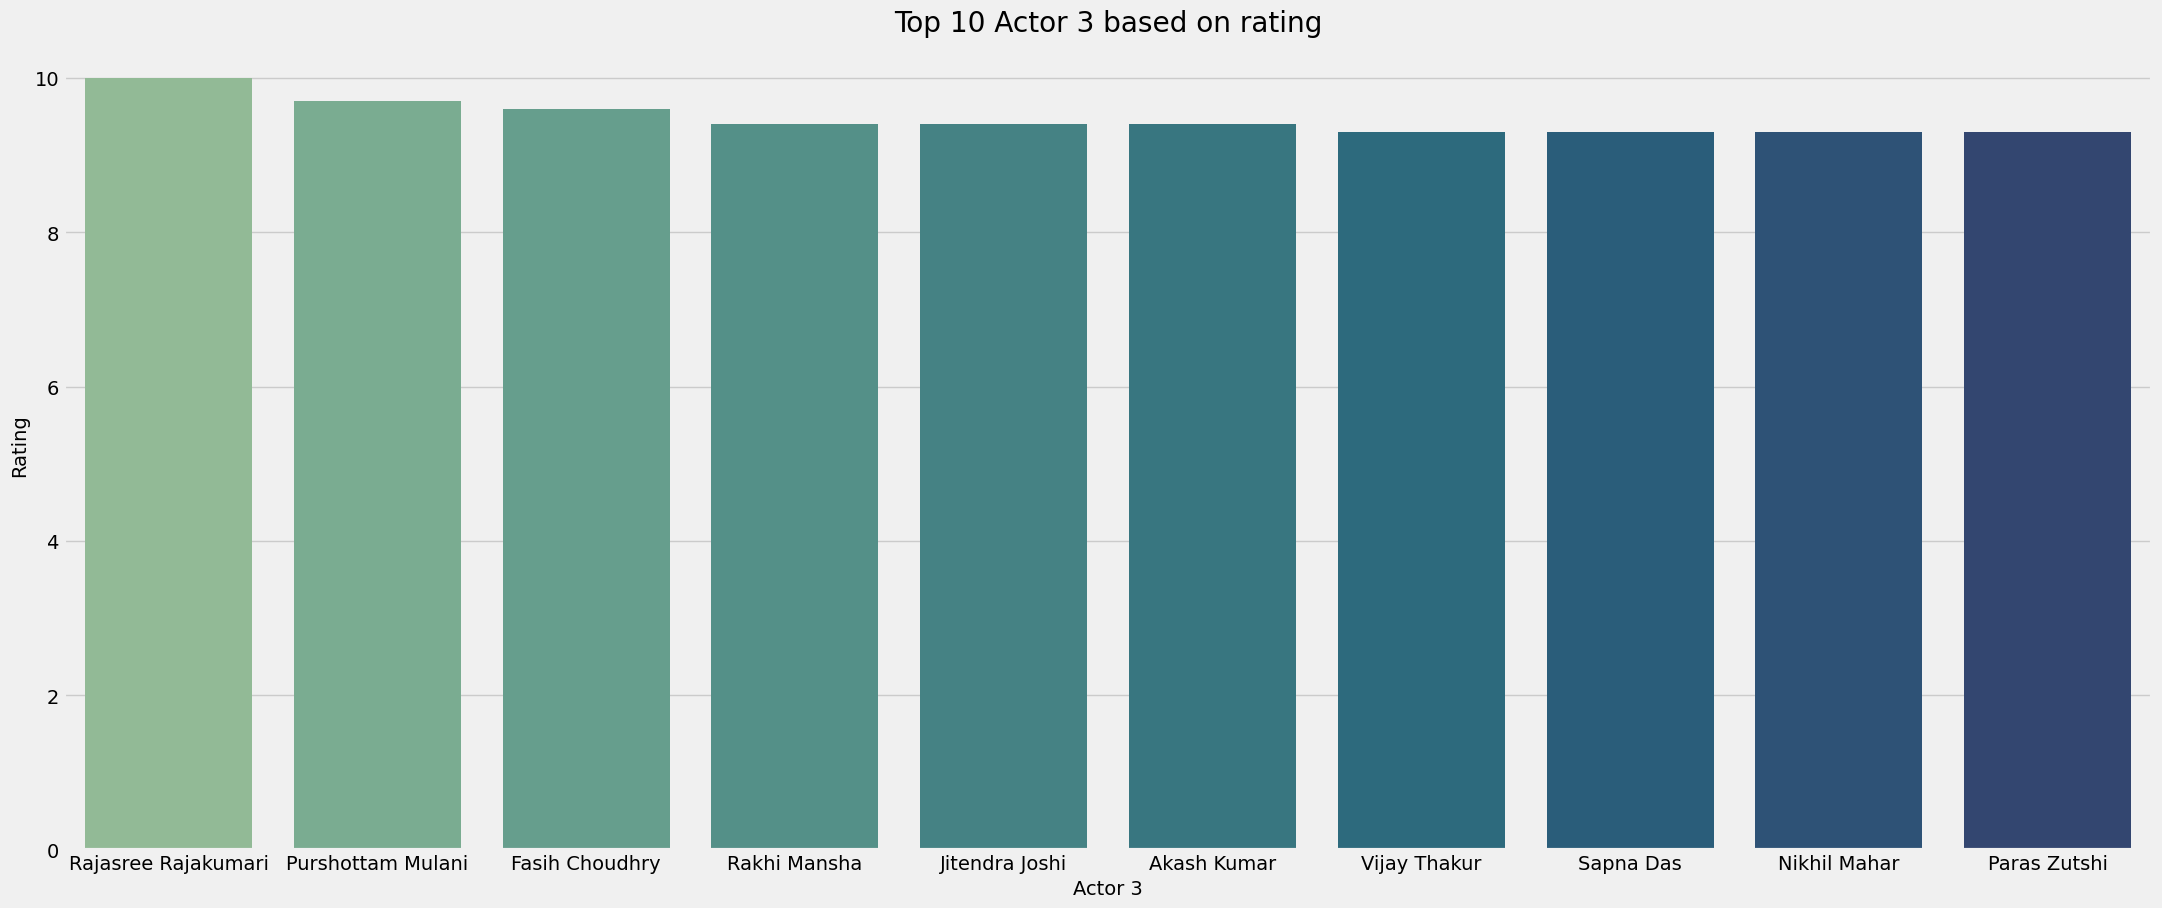

<Figure size 640x480 with 0 Axes>

In [25]:
##plotting best 10 actors by rating
                
actor_3 =movie_df[['Actor 3','Rating']].sort_values(by ='Rating', ascending=False).head(10)
plt.figure(figsize=(24,10))
sns.barplot(data = actor_3 ,x = 'Actor 3', y ='Rating', palette = 'crest')
plt.title('Top 10 Actor 3 based on rating')
plt.show()
plt.savefig('Top 10 Actor 3 based on rating.jpg')

In [26]:
movie_df.to_csv('indian movies.csv')

In [27]:
movie = pd.read_csv('indian movies.csv')

In [28]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11366 entries, 0 to 11365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11366 non-null  int64  
 1   Name        11366 non-null  object 
 2   Duration    11366 non-null  float64
 3   Genre       11366 non-null  object 
 4   Rating      11366 non-null  float64
 5   Votes       11366 non-null  float64
 6   Director    11366 non-null  object 
 7   Actor 1     11366 non-null  object 
 8   Actor 2     11366 non-null  object 
 9   Actor 3     11366 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 888.1+ KB


## Data preparation

In [29]:
movie.drop(['Unnamed: 0'],axis= 1, inplace = True)

In [30]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Genre']= le.fit_transform(movie['Genre'])
movie['Genre'].unique()

array([275, 326, 221, 190, 341, 387,  38, 380, 390, 192, 184, 186, 185,
       238, 392, 205,   0, 320, 174,  86, 311, 385, 384, 321,  46,  54,
       448, 196, 128,  84, 251, 453, 447, 164, 388, 231, 336, 109, 220,
        29, 254, 391, 241, 335, 343, 297,  18, 227,   7,  40, 255, 319,
        17,  98, 420,  64, 115, 427, 331, 177, 415, 306, 300, 345,   3,
       429, 416, 360,  85,  51, 422, 363, 340, 289,  20,  53, 322, 329,
       225,  79,  28,  93,  43, 296,  78,  44,  75, 314, 236, 445, 137,
       250,  12, 394, 349,  19, 197, 434, 299, 436, 417, 358, 352, 239,
       407, 324, 332, 103, 158, 235, 395,  73,  82, 443, 323, 237,  35,
        14, 223,  50,  26, 162,  21, 295,   6,  49, 136, 249, 286, 307,
       224, 400,  25, 312,  33, 121,  45, 111, 124,   5,   1, 176, 116,
       377, 309, 410, 274, 423, 354, 378, 404, 107, 419, 283, 167, 229,
       165, 342, 301, 217, 292,  89,  34,  36, 139,  52, 204, 269, 285,
         4, 260, 212, 161, 133, 168,  23, 424,  10, 246,  87,  9

In [31]:
## saving the labelencoded column in a pickle file
import pickle
with open('genre.pkl','wb') as encoder_file:
    pickle.dump(le,encoder_file)

In [32]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Name']= le.fit_transform(movie['Name'])
movie['Name'].unique()

array([    0,     1,     2, ..., 10440, 10442, 10441])

In [33]:
## saving the labelencoded column in a pickle file
import pickle
with open('name.pkl','wb') as encoder_file:
    pickle.dump(le,encoder_file)

In [34]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Director']= le.fit_transform(movie['Director'])
movie['Director'].unique()

array([1218, 4038, 2608, ..., 1246, 2366, 4451])

In [35]:
## saving the labelencoded column in a pickle file
import pickle
with open('director.pkl', 'wb') as encoder_file:
    pickle.dump(le,encoder_file)

In [36]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Actor 1']= le.fit_transform(movie['Actor 1'])
movie['Actor 1'].unique()

array([2726, 3091, 2422, ..., 3369,  875, 1952])

In [37]:
## saving the labelencoded column in a pickle file
import pickle
with open('actor 1.pkl','wb') as encoder_file:
    pickle.dump(le,encoder_file)


In [38]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Actor 2']= le.fit_transform(movie['Actor 2'])
movie['Actor 2'].unique()

array([4239, 2543, 1338, ...,  898, 2656, 3346])

In [39]:
## saving the labelencoded column in a pickle file
import pickle
with open('actor 2.pkl','wb') as encoder_file:
    pickle.dump(le,encoder_file)


In [40]:
## Transforming the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movie['Actor 3']= le.fit_transform(movie['Actor 3'])
movie['Actor 3'].unique()

array([ 514, 3265, 3813, ..., 3672, 4299, 4039])

In [41]:
## saving the labelencoded column in a pickle file
import pickle
with open('actor 3.pkl','wb') as encoder_file:
    pickle.dump(le,encoder_file)


In [42]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11366 entries, 0 to 11365
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11366 non-null  int32  
 1   Duration  11366 non-null  float64
 2   Genre     11366 non-null  int32  
 3   Rating    11366 non-null  float64
 4   Votes     11366 non-null  float64
 5   Director  11366 non-null  int32  
 6   Actor 1   11366 non-null  int32  
 7   Actor 2   11366 non-null  int32  
 8   Actor 3   11366 non-null  int32  
dtypes: float64(3), int32(6)
memory usage: 532.9 KB


In [43]:
## creating target variable
from sklearn.model_selection import train_test_split
X,y = movie.drop('Rating', axis = 1), movie['Rating']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train

Name  Duration  Genre   Votes  Director  Actor 1  Actor 2  Actor 3
9360    8579     145.0    129   844.0      4536      106     3616     3787
1559    1394     128.0    415    68.0      1589     2053     3675     2512
5950    5442      87.0    174    56.0      2404     2515     3538     3547
9296    8518     110.0     19  2029.1       270     3264     3901     3531
378      348     130.8    275   299.0      4384     2941     1913     2214
...      ...       ...    ...     ...       ...      ...      ...      ...
7540    6907      89.0    380  2029.1      3999      386      301     3897
7221    6614     130.0    340  3763.0       440     1816      507     1086
1318    1182     163.0     40   113.0      2779      745     2717     1695
8915    8189     123.0    307  1177.0      3517     2961     3246     1671
11055  10160     140.0    333   960.0      3016     2910     1967     2601

[9092 rows x 8 columns]

In [44]:
y_train

9360     5.4
1559     4.0
5950     5.8
9296     6.2
378      5.2
        ... 
7540     6.2
7221     5.4
1318     2.7
8915     2.8
11055    7.6
Name: Rating, Length: 9092, dtype: float64

In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [46]:
linreg.fit(X_train.values,y_train)
linreg.score(X_train.values,y_train)

0.031952843630394634

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor()
rfr.fit(X_train.values,y_train)

RandomForestRegressor()

In [49]:
rfr.score(X_test.values,y_test)

0.19185810152882765

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
gbr = GradientBoostingRegressor()

In [52]:
gbr.fit(X_train.values,y_train)

GradientBoostingRegressor()

In [53]:
gbr.score(X_test.values,y_test)

0.1960414076098047

In [54]:
import pickle

In [55]:
pickle_out= open('GradientBoostingRegressor.pkl', 'wb')
pickle.dump(gbr,pickle_out)
pickle_out.close()

In [56]:
pickle_out= open('movie.pkl', 'wb')
pickle.dump(gbr,pickle_out)
pickle_out.close()

In [57]:
pwd

'C:\\Users\\Dell\\codsoft 4'